In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [2]:
from sklearn.feature_selection import VarianceThreshold

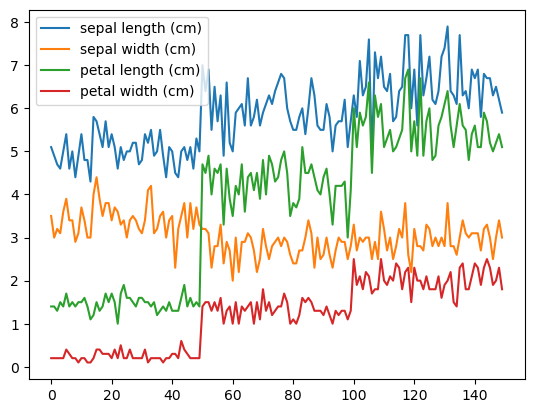

In [3]:
iris = load_iris()

X = iris.data
y = iris.target

plt.plot(X)
plt.legend(iris.feature_names)

In [4]:
X.var(axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [5]:
selector = VarianceThreshold(threshold=0.2)
selector.fit_transform(X)
selector.get_support()

array([ True, False,  True,  True])

In [7]:
np.array(iris.feature_names)[selector.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

# SelectKBest

In [14]:
from sklearn.feature_selection import SelectKBest, chi2

In [16]:
chi2(X, y)

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [23]:
selector = SelectKBest(chi2, k=2)
selector.fit_transform(X, y)
selector.get_support()

array([False, False,  True,  True])

# SelectFromModel

In [21]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

In [30]:
selector = SelectFromModel(SGDClassifier(random_state=0), threshold='mean')
selector.fit_transform(X, y)
selector.get_support()

selector.estimator_.coef_.mean(axis=0).mean()

-0.9721175565229512

In [32]:
selector.estimator_.coef_.mean(axis=0)

array([-26.04295373, -35.56158609,  37.87734374,  19.83872585])

In [26]:
X.shape

(150, 4)

In [28]:
y.shape

(150,)


# Recursive Feature Selection 

In [35]:
from sklearn.feature_selection import RFE, RFECV

In [37]:
selector  = RFECV(SGDClassifier(), step= 1, min_features_to_select =2, cv=5)
selector.fit(X, y)
selector.ranking_

array([2, 1, 1, 1])